In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import autoviz
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'

In [ ]:
%cd '/content/gdrive/MyDrive/Kaggle'

/content/gdrive/MyDrive/Kaggle


In [ ]:
!pwd

/content/gdrive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d mdmahmudulhasansuzan/students-adaptability-level-in-online-education

students-adaptability-level-in-online-education.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls
!unzip \*.zip

kaggle.json
students-adaptability-level-in-online-education.zip
students_adaptability_level_online_education.csv
Archive:  students-adaptability-level-in-online-education.zip
replace students_adaptability_level_online_education.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv('students_adaptability_level_online_education.csv')

In [ ]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
data.shape

(1205, 14)

In [ ]:
data.isnull().sum( )

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [ ]:
for i in data.columns:
  print(i, ":", data[i].unique().tolist())

Gender : ['Boy', 'Girl']
Age : ['21-25', '16-20', '11-15', '26-30', '6-10', '1-5']
Education Level : ['University', 'College', 'School']
Institution Type : ['Non Government', 'Government']
IT Student : ['No', 'Yes']
Location : ['Yes', 'No']
Load-shedding : ['Low', 'High']
Financial Condition : ['Mid', 'Poor', 'Rich']
Internet Type : ['Wifi', 'Mobile Data']
Network Type : ['4G', '3G', '2G']
Class Duration : ['3-6', '1-3', '0']
Self Lms : ['No', 'Yes']
Device : ['Tab', 'Mobile', 'Computer']
Adaptivity Level : ['Moderate', 'Low', 'High']


Text(0.5, 1.0, 'Adaptivity Level Distribution')

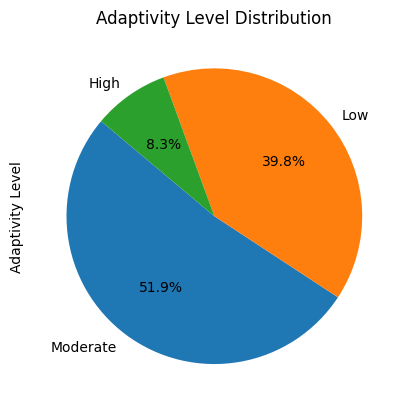

In [ ]:
data['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140)
plt.title("Adaptivity Level Distribution")

Text(0.5, 1.0, 'Education Level Distribution')

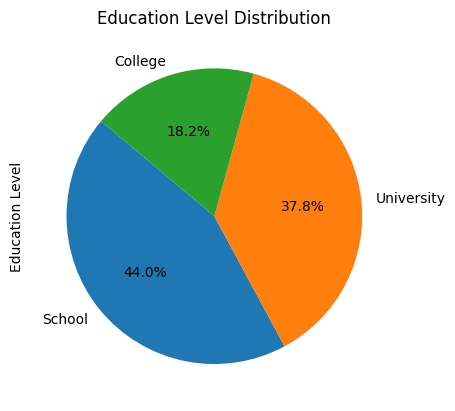

In [ ]:
data['Education Level'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Education Level Distribution')

Text(0.5, 1.0, 'Gender Distribution')

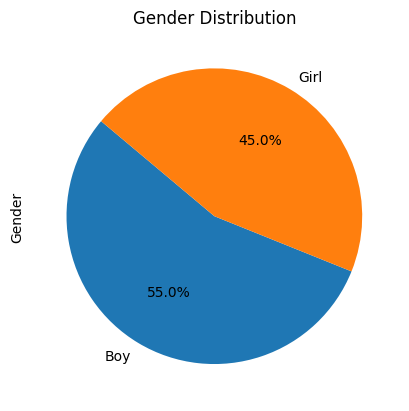

In [ ]:
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Device')

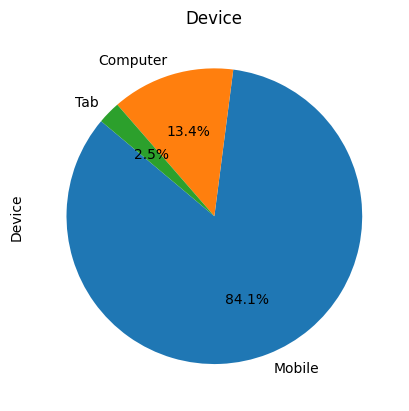

In [ ]:
data['Device'].value_counts().plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Device')

In [ ]:
def create_groups(
    df: pd.DataFrame, var1: str,
    var2: str)->pd.DataFrame:

    category = df.groupby([var1,var2])[var2].count().to_frame()

    print('Adaptivity' + ' by ' + var1)

    return category

**EDUCATION DISTRIBUTION BY ADAPTIVITY**

In [ ]:
create_groups(data, 'Education Level', 'Adaptivity Level')

Adaptivity by Education Level


Adaptivity Level
Education Level Adaptivity Level                  
College         High                             3
                Low                            120
                Moderate                        96
School          High                            47
                Low                            182
                Moderate                       301
University      High                            50
                Low                            178
                Moderate                       228

**AGE DISTRIBUTION BY ADAPTIVITY LEVEL**

In [ ]:
create_groups(data, 'Age', 'Adaptivity Level')

Adaptivity by Age


Adaptivity Level
Age   Adaptivity Level                  
1-5   Low                             17
      Moderate                        64
11-15 High                            28
      Low                            120
      Moderate                       205
16-20 High                             5
      Low                            144
      Moderate                       129
21-25 High                            38
      Low                            139
      Moderate                       197
26-30 High                            12
      Low                             36
      Moderate                        20
6-10  High                            17
      Low                             24
      Moderate                        10

import numpy as np
from google.colab import autoviz
df_3774769727934206735 = autoviz.get_df('df_3774769727934206735')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3774769727934206735, *['Adaptivity Level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3774769727934206735 = autoviz.get_df('df_3774769727934206735')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3774769727934206735, *['Adaptivity Level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3774769727934206735 = autoviz.get_df('df_3774769727934206735')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3774769727934206735, *['Adaptivity Level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3774769727934206735 = autoviz.get_df('df_3774769727934206735')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3774769727934206735, *['Adaptivity Level'], **{})
chart

In [ ]:
df_3774769727934206735 = autoviz.get_df('df_3774769727934206735')

def value_plot(df, y, sort_ascending=False, figsize=(5, 3)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3774769727934206735, *['Adaptivity Level'], **{})
chart

Text(0.5, 1.0, 'Age Distribution')

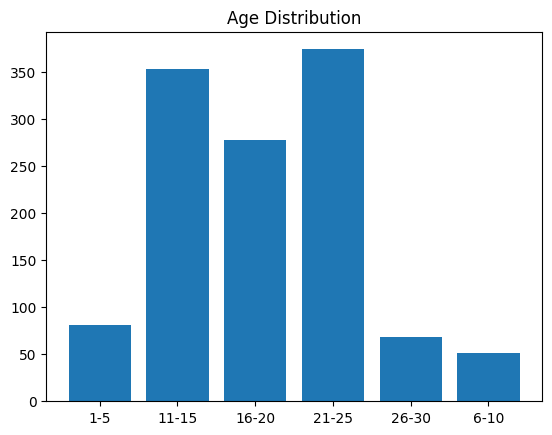

In [ ]:
age = data['Age'].value_counts().sort_index()
plt.bar(age.index, age.values)
plt.title('Age Distribution')

**GENDER DISTRIBUTION BY ADAPTIVITY LEVEL**

In [ ]:
create_groups(data, 'Gender', 'Adaptivity Level')

Adaptivity by Gender


Adaptivity Level
Gender Adaptivity Level                  
Boy    High                            71
       Low                            245
       Moderate                       347
Girl   High                            29
       Low                            235
       Moderate                       278

Text(0.5, 1.0, 'Age Distribution')

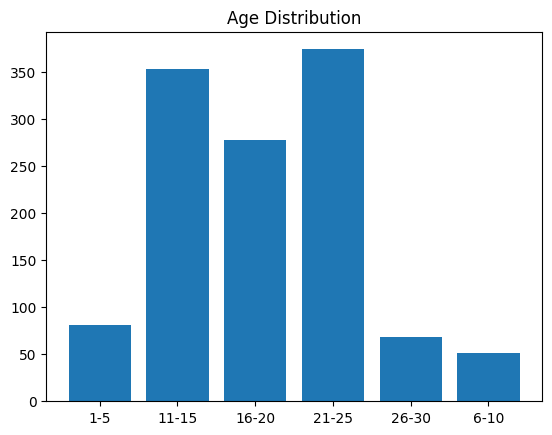

In [ ]:
age = data['Age'].value_counts().sort_index()
plt.bar(age.index, age.values)
plt.title('Age Distribution')

**AGE DISTRIBUTION BY GENDER DISTRIBUTION**

In [ ]:
create_groups(data, 'Age', 'Gender')

Adaptivity by Age


Gender
Age   Gender        
1-5   Boy         14
      Girl        67
11-15 Boy        211
      Girl       142
16-20 Boy        109
      Girl       169
21-25 Boy        265
      Girl       109
26-30 Boy         42
      Girl        26
6-10  Boy         22
      Girl        29

**BAR PLOT FOR DIFFERENT CATEGORIES BY ADAPTIVITY LEVEL**

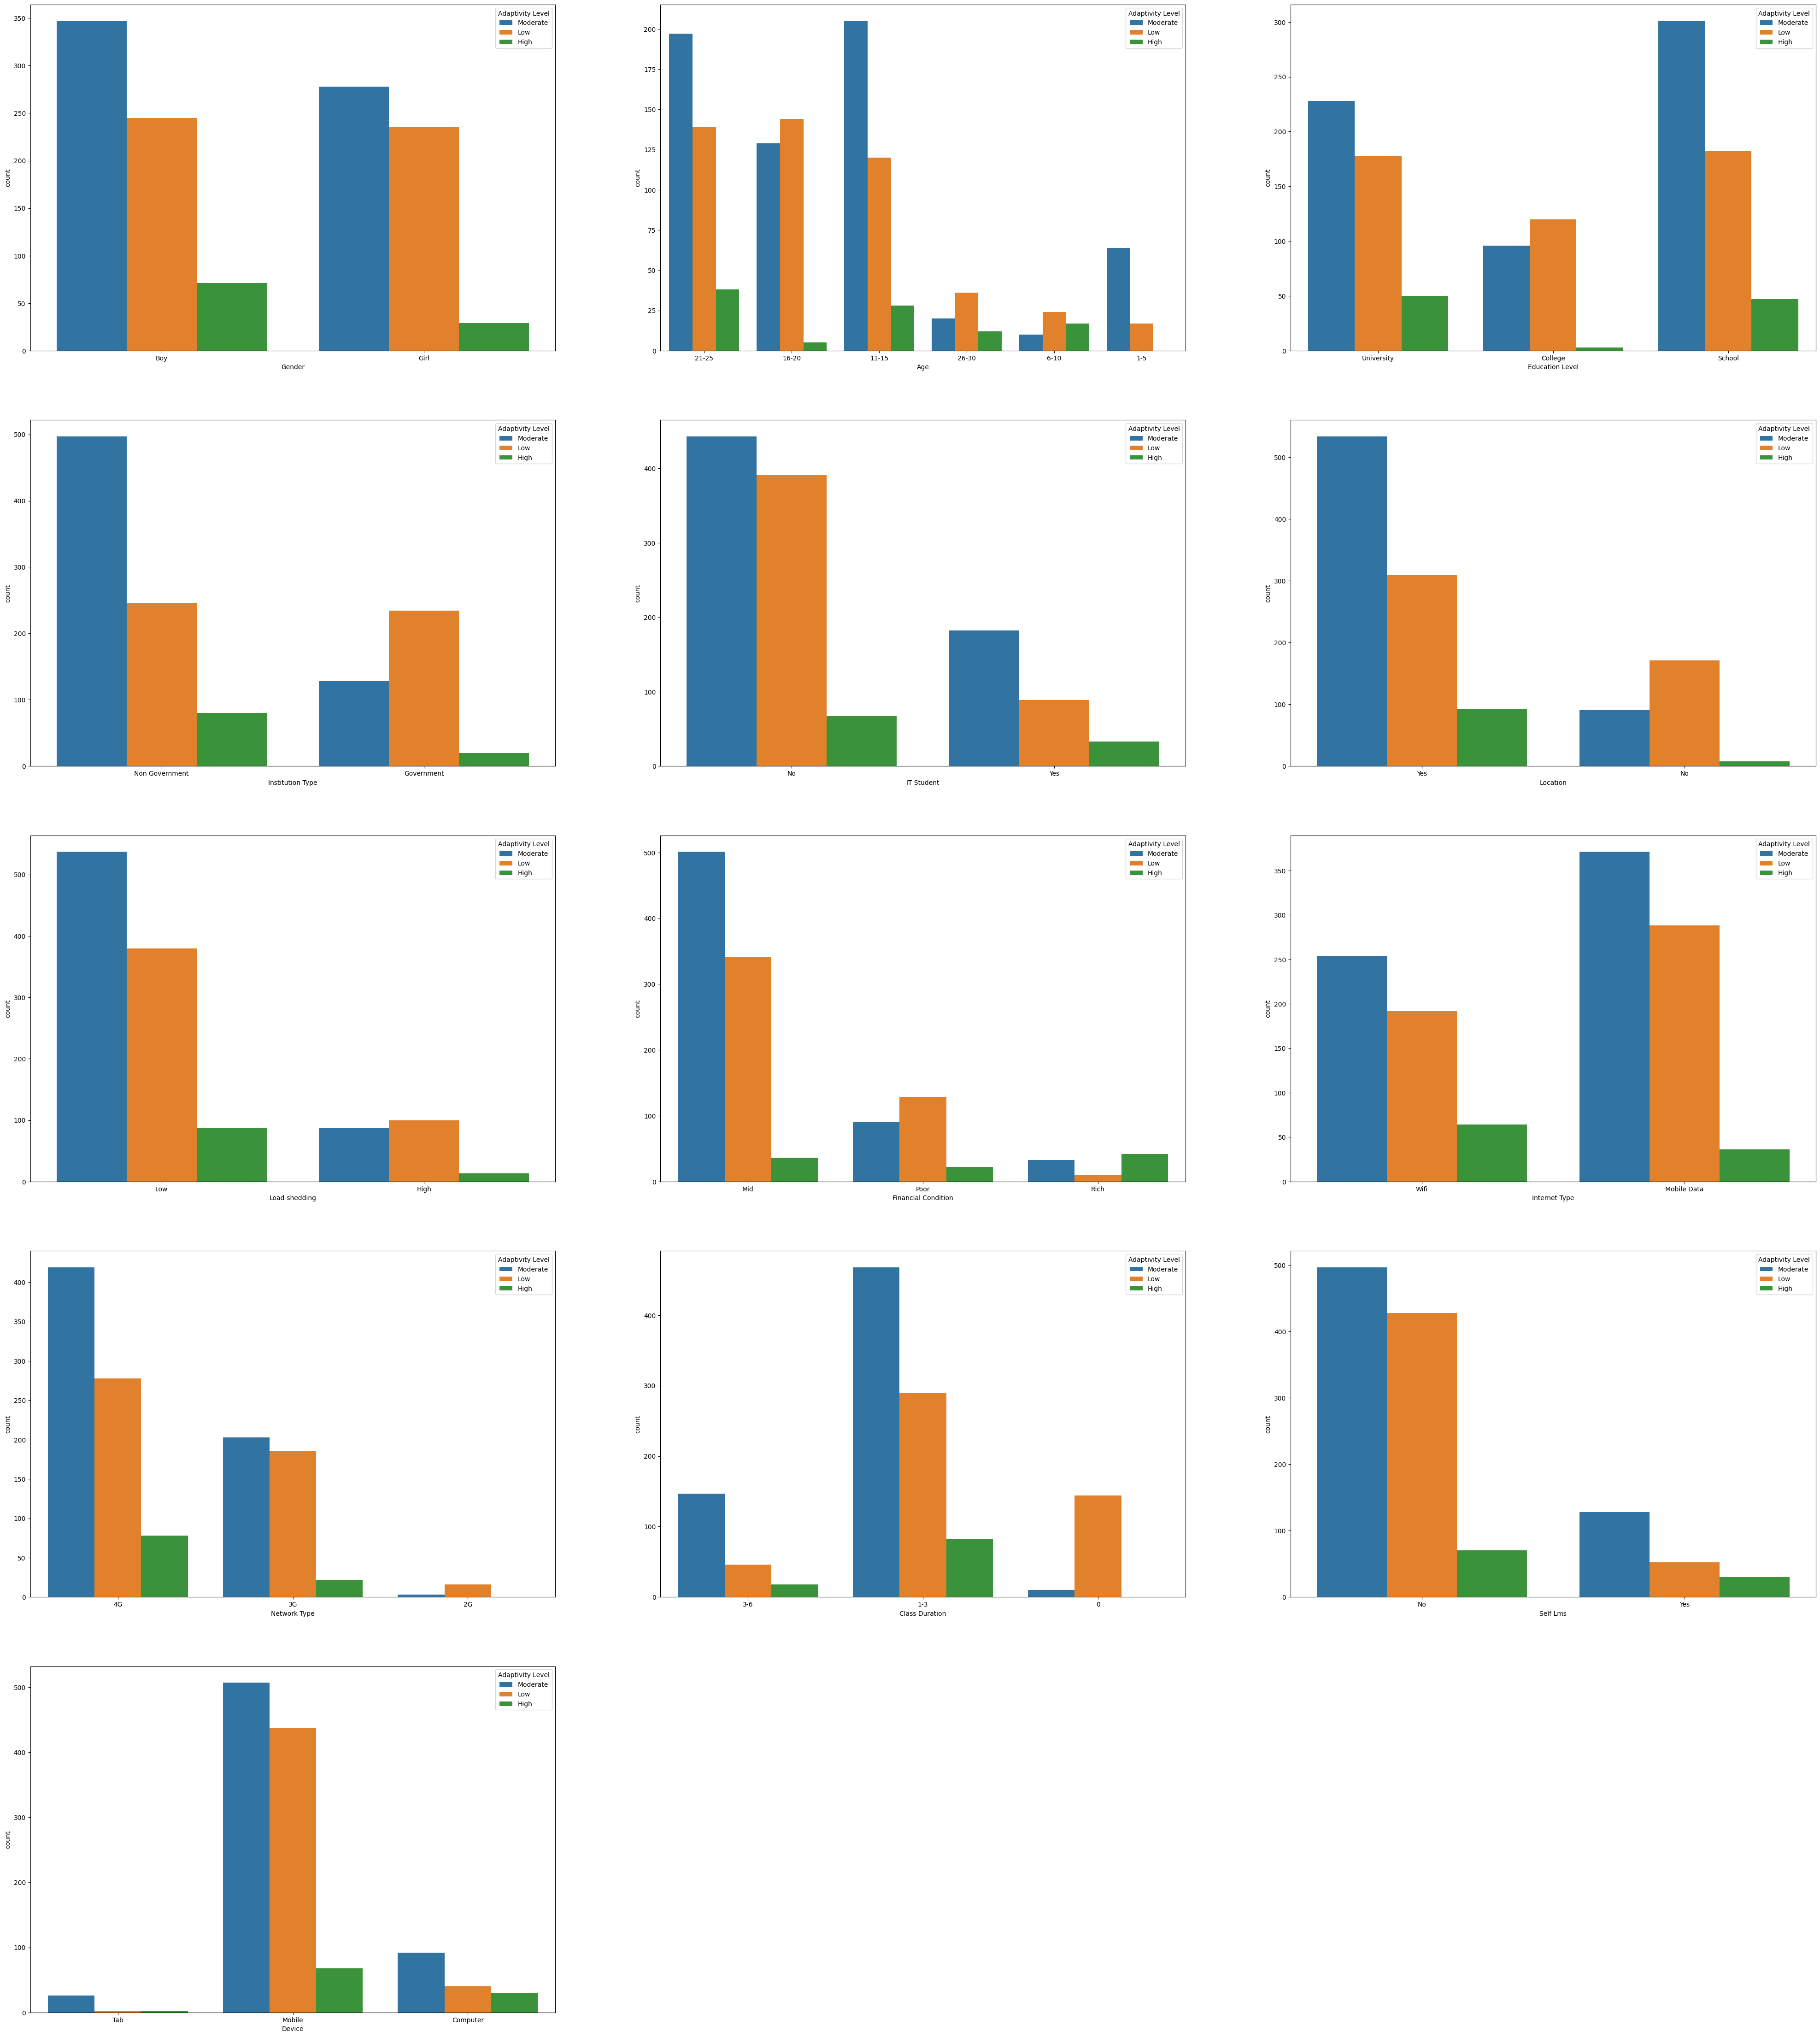

In [ ]:
i = 1
plt.figure(figsize = (50,80))
for feature in [col for col in data.columns if col!='Adaptivity Level' ]:
    plt.subplot(7,3,i),
    sns.countplot(x = feature , hue='Adaptivity Level', data= data,)

    i +=1

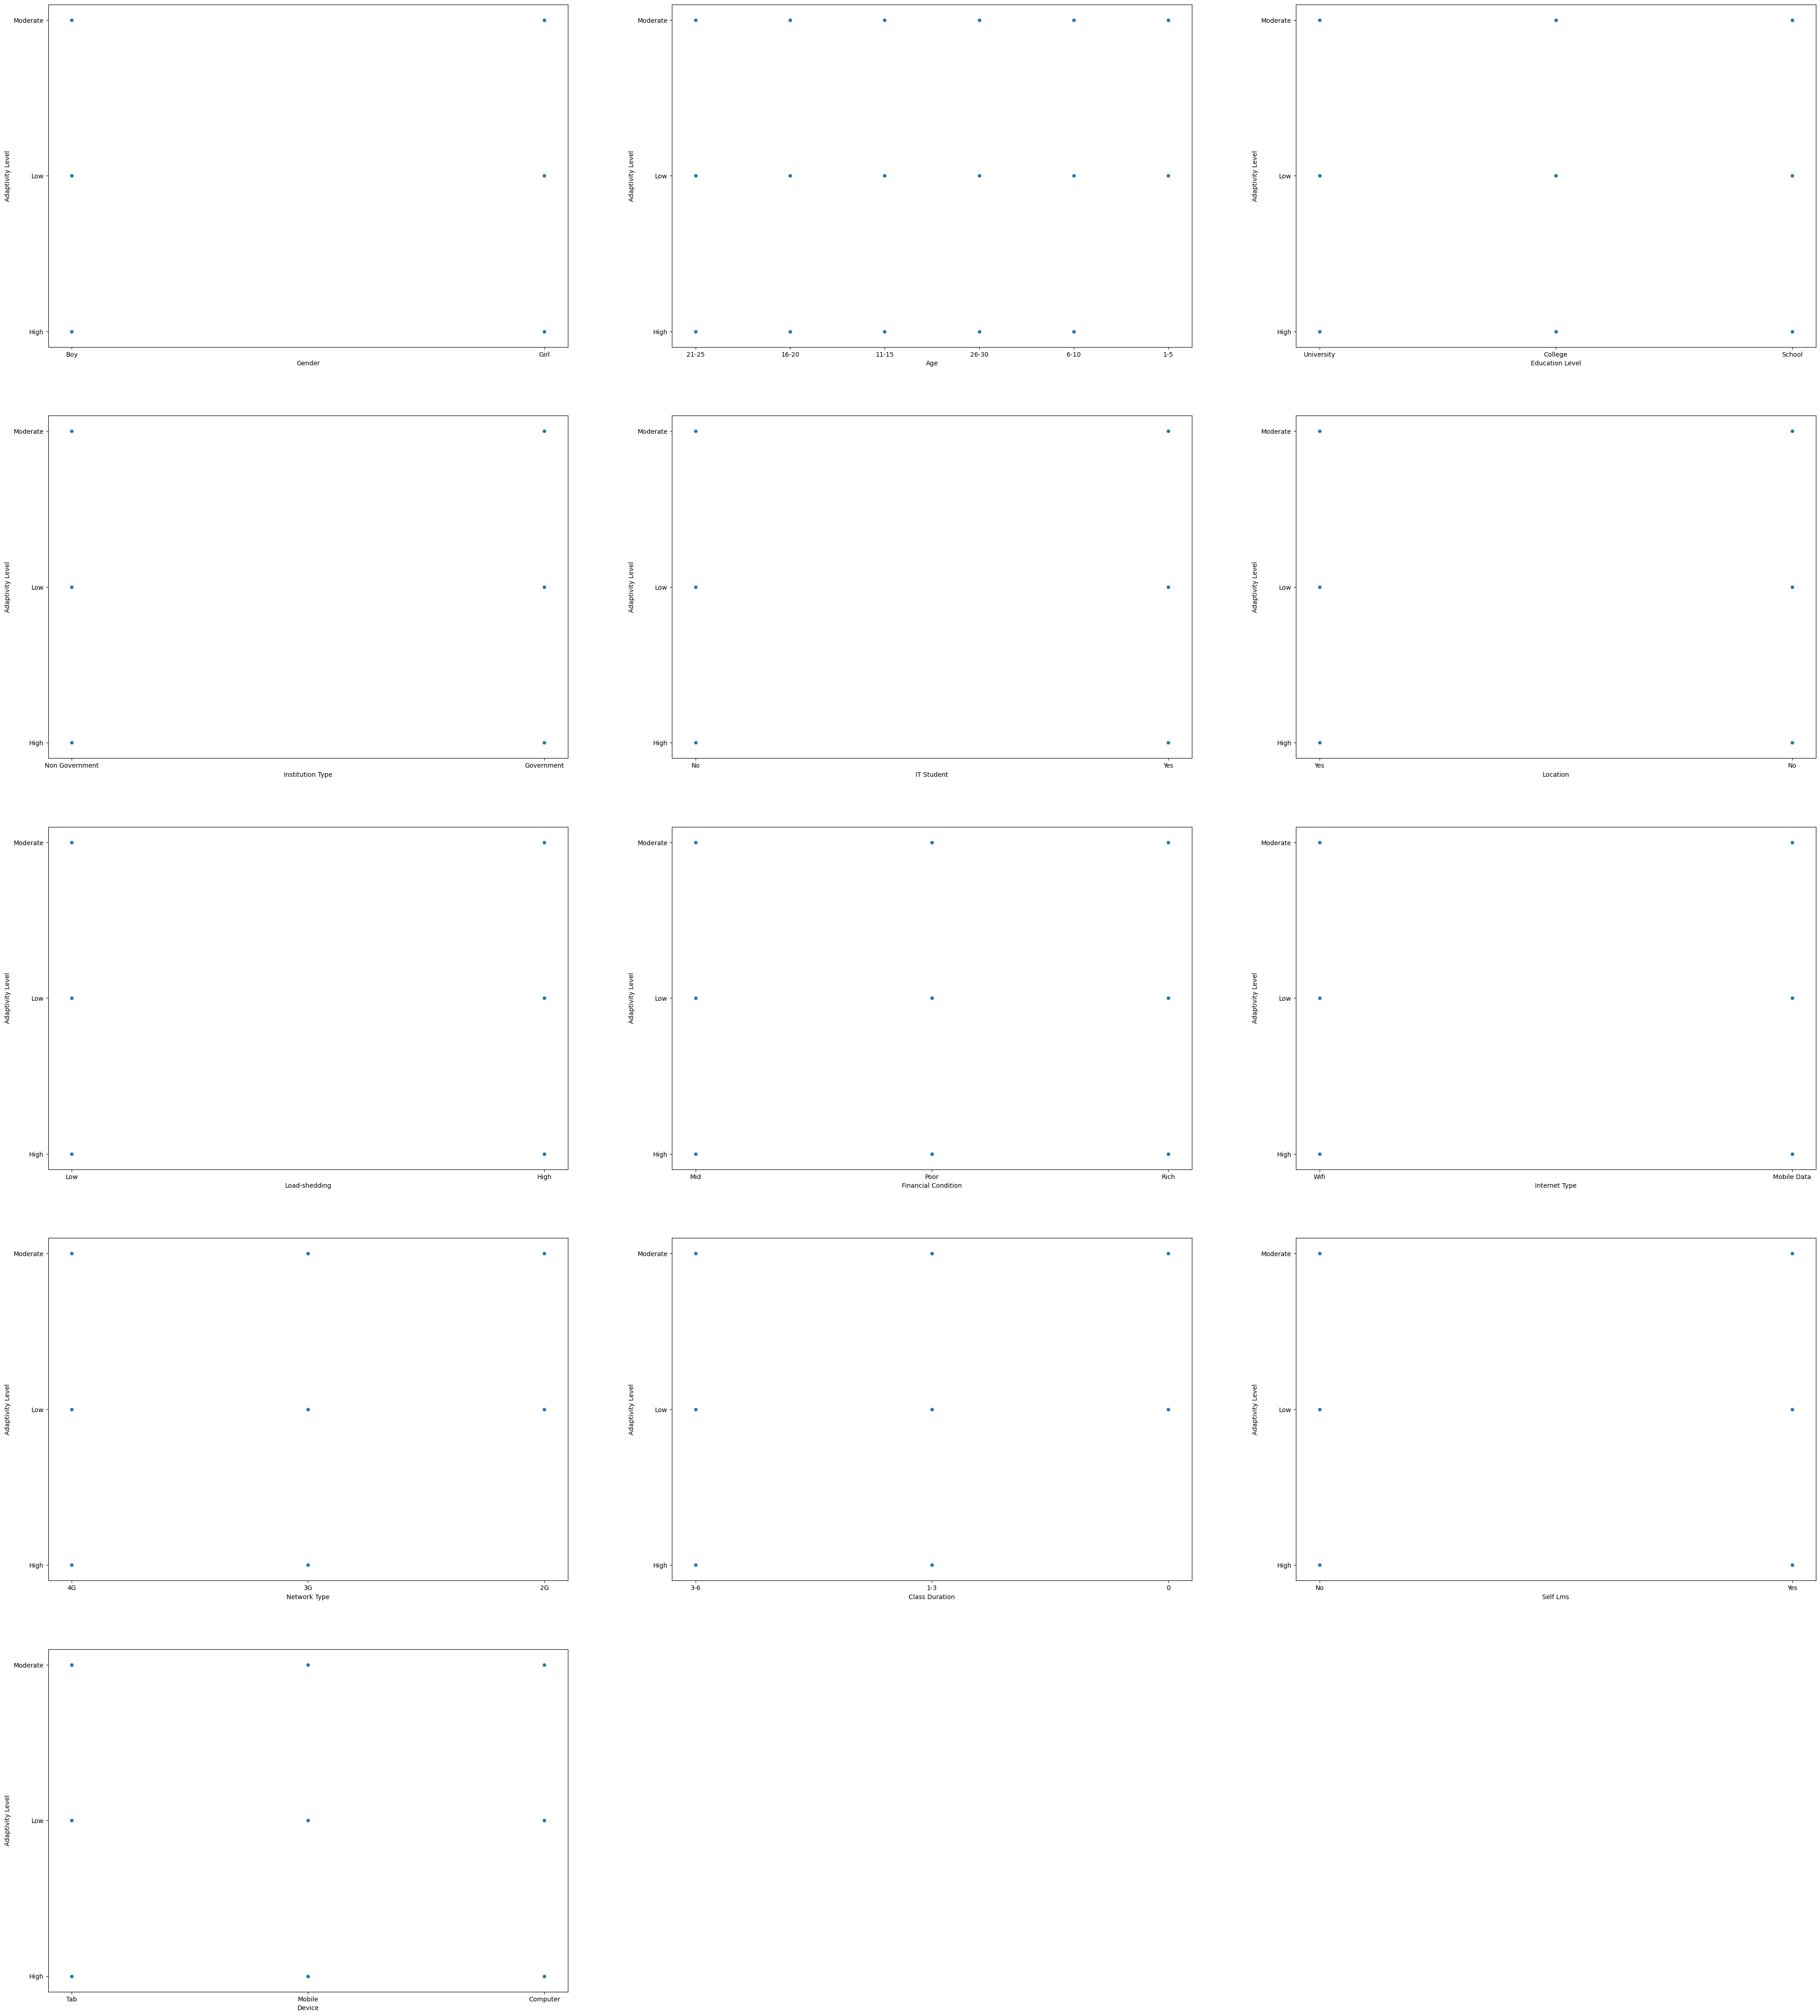

In [ ]:
i = 1
plt.figure(figsize=(50, 80))
for feature in [col for col in data.columns if col != 'Adaptivity Level']:
    plt.subplot(7, 3, i)
    sns.scatterplot(x=feature, y='Adaptivity Level', data=data)
    i += 1

In [ ]:
data.drop(columns=['Education Level','Institution Type','IT Student','Self Lms'], inplace=True)

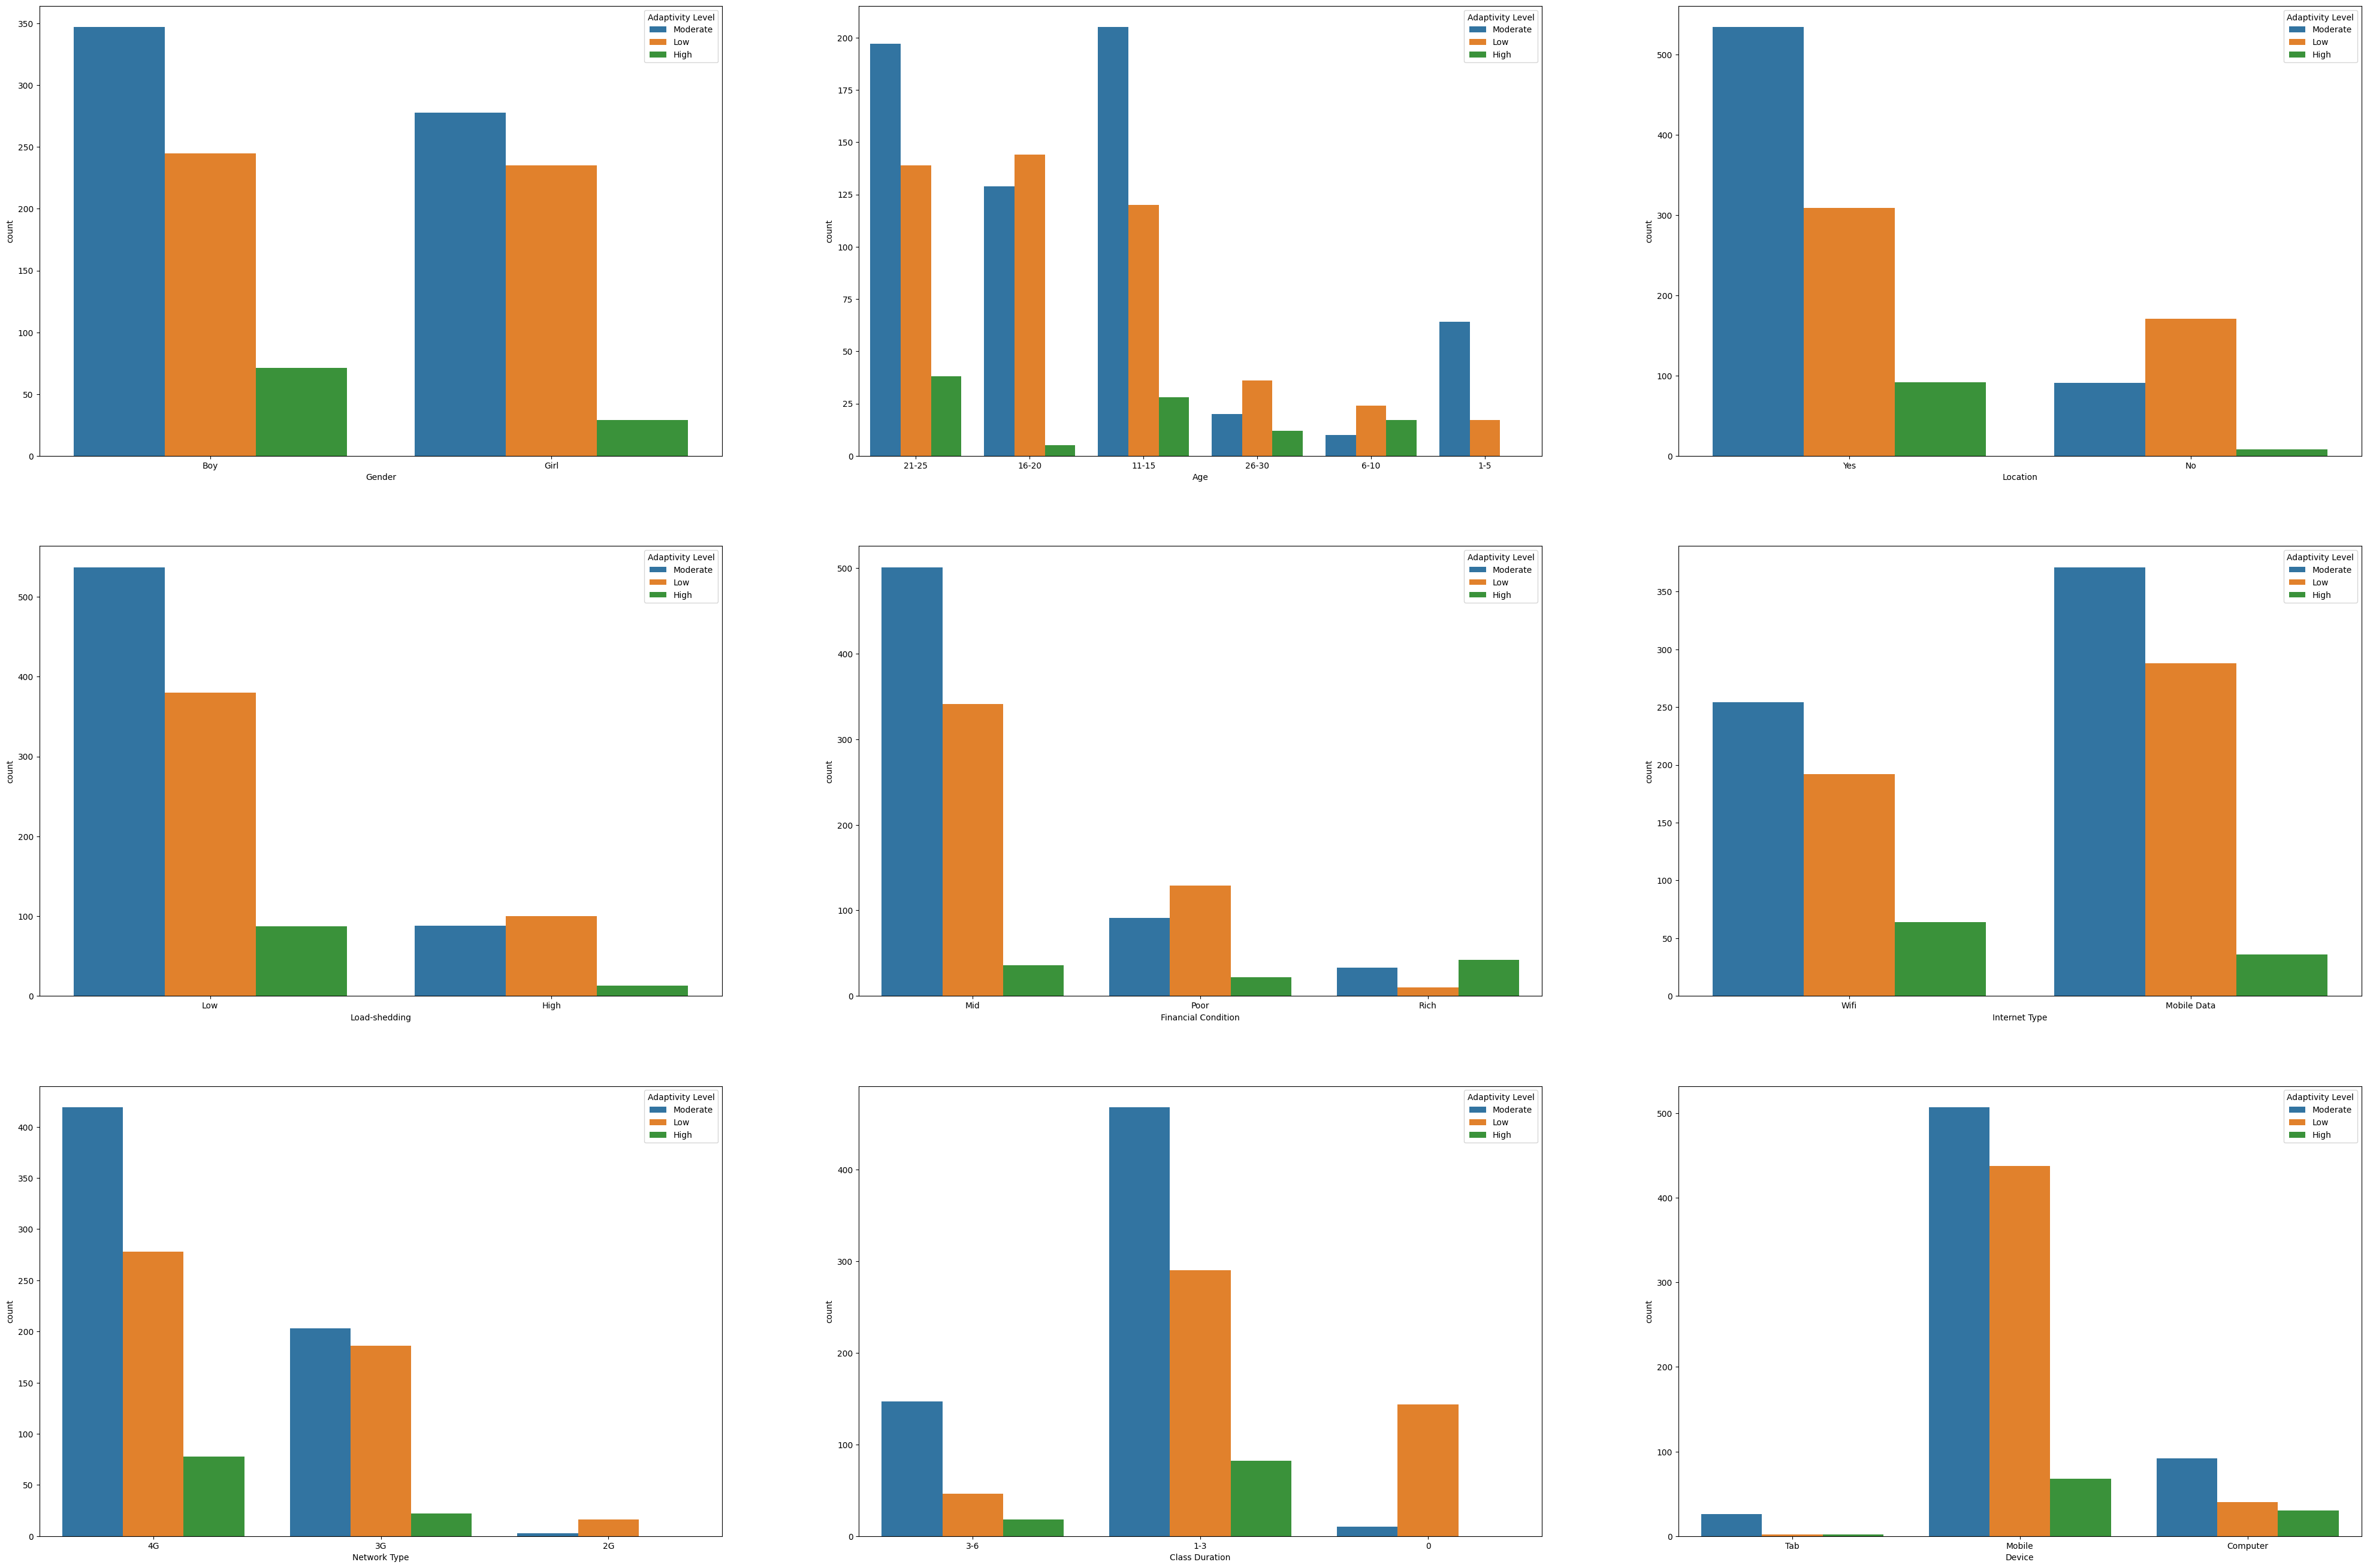

In [ ]:
i = 1
plt.figure(figsize = (50,80))
for feature in [col for col in data.columns if col!='Adaptivity Level' ]:
    plt.subplot(7,3,i),
    sns.countplot(x = feature , hue='Adaptivity Level', data= data,)

    i +=1

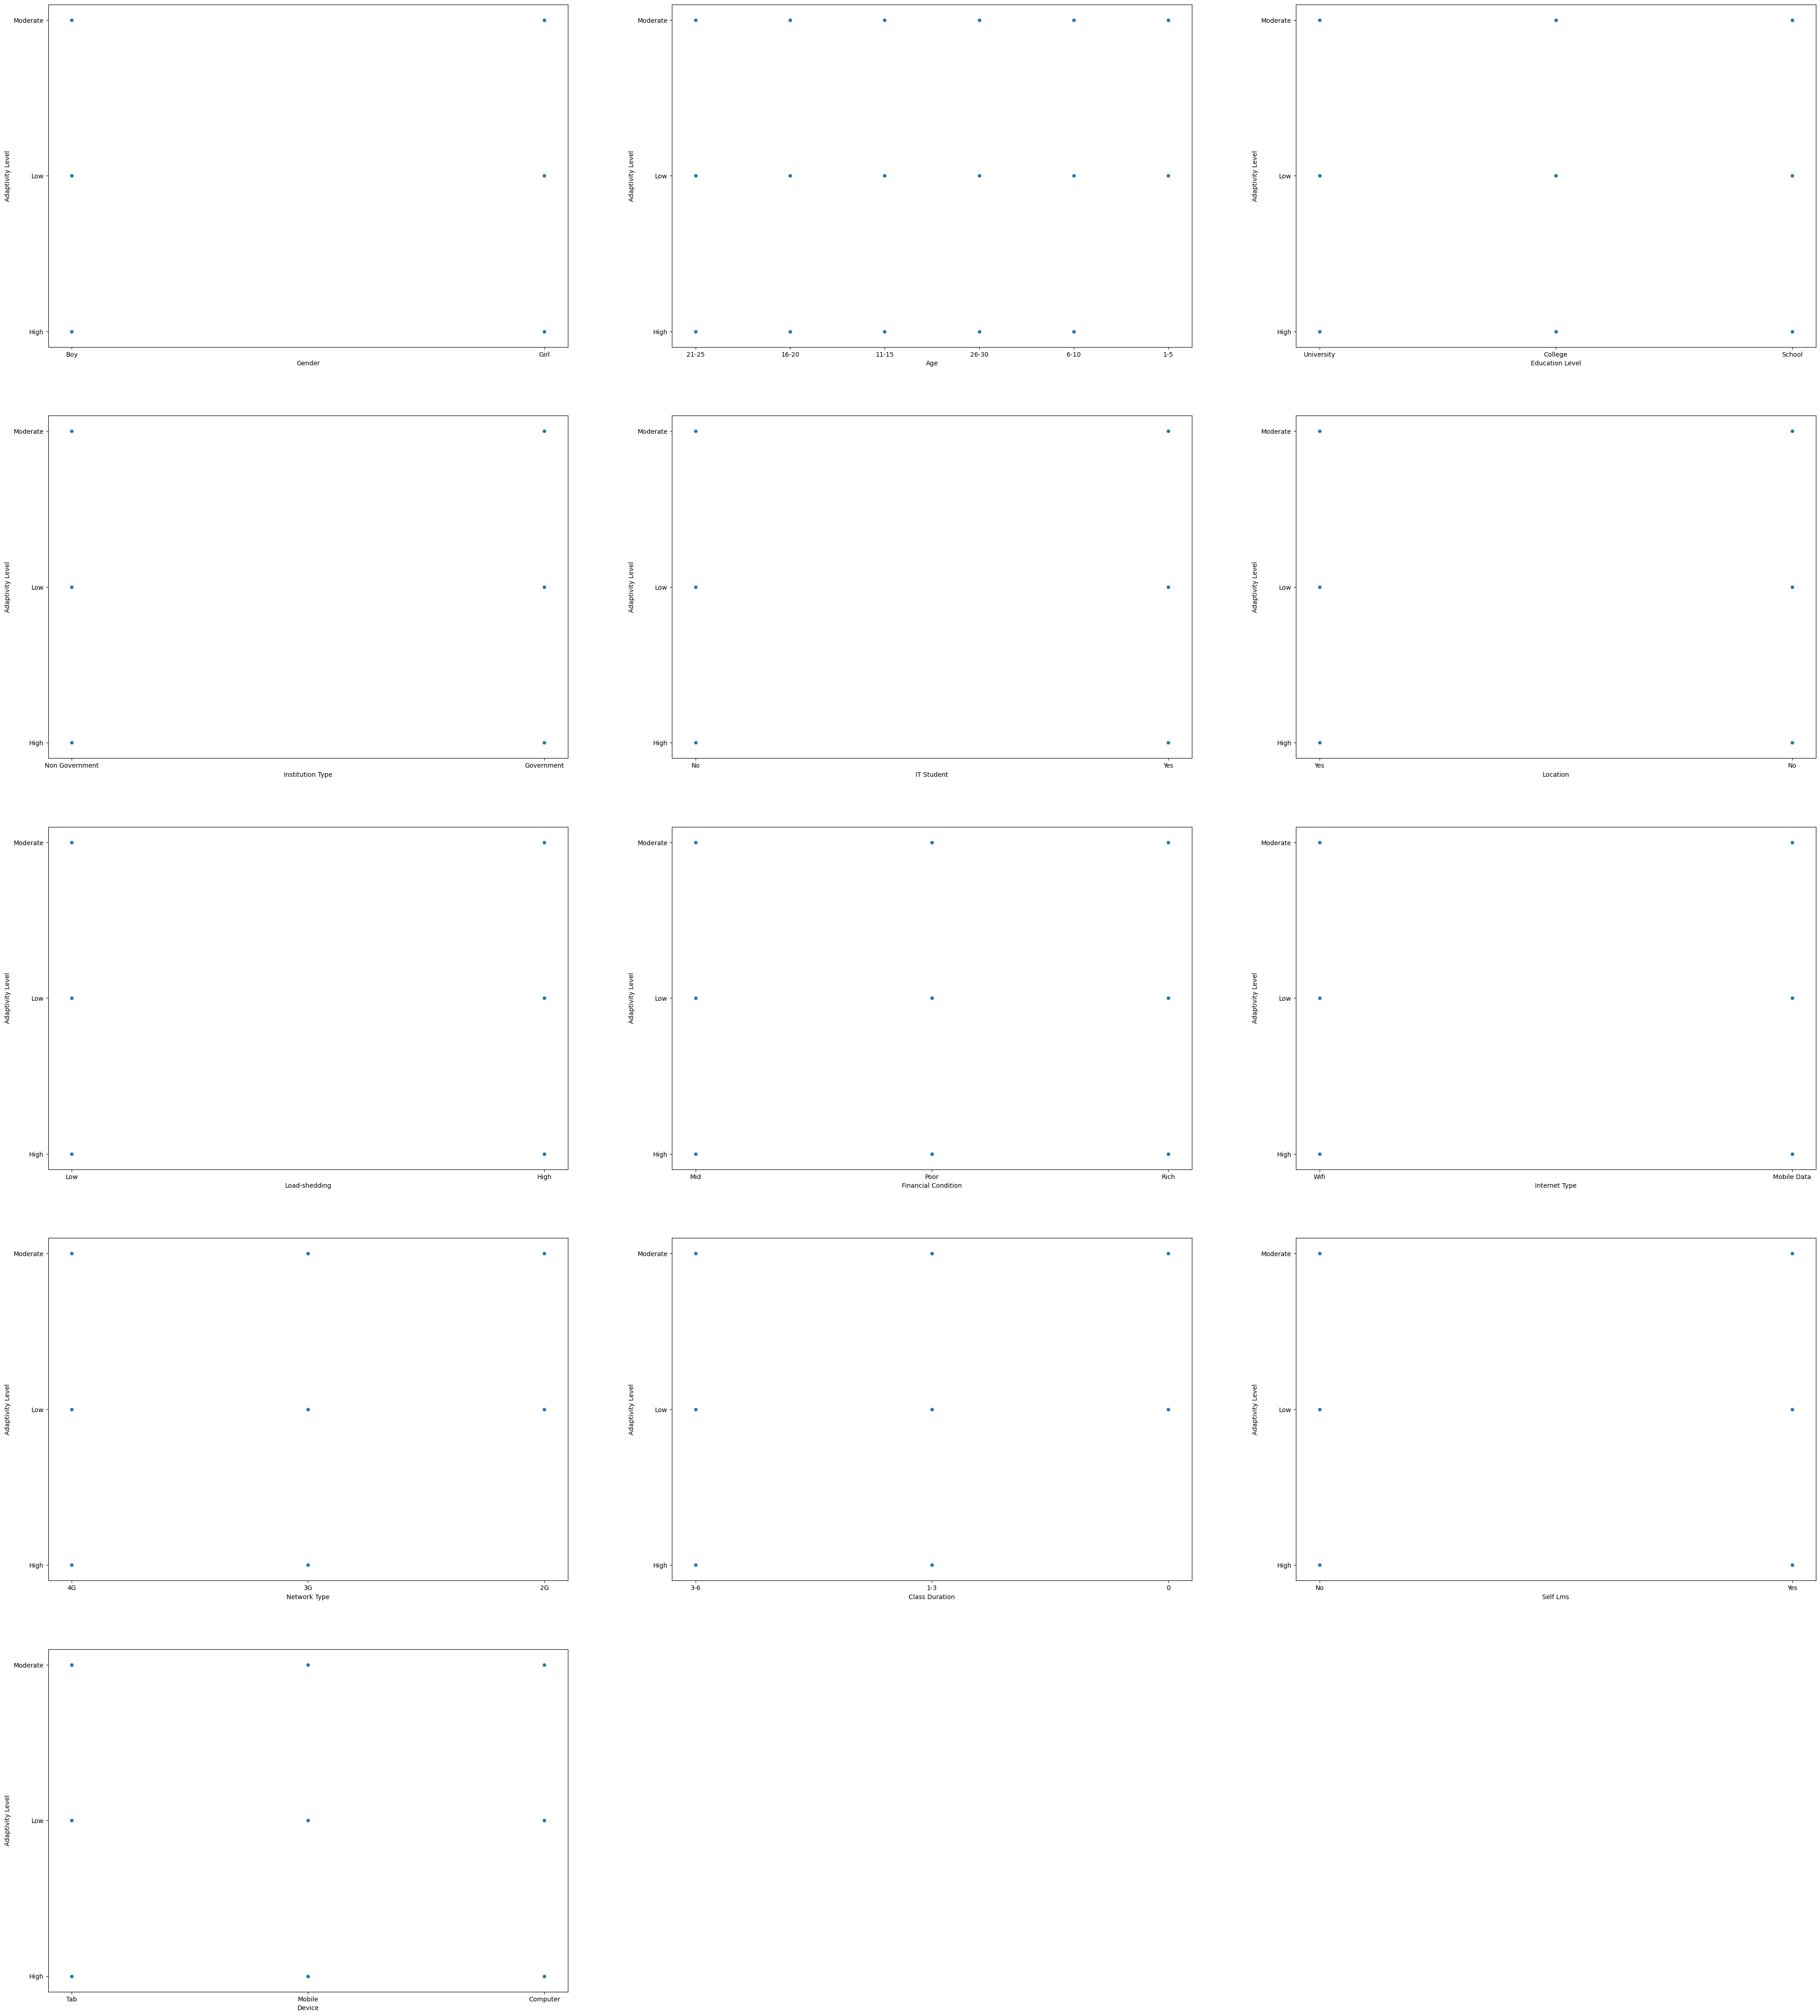

In [ ]:
i = 1
plt.figure(figsize=(50, 80))
for feature in [col for col in data.columns if col != 'Adaptivity Level']:
    plt.subplot(7, 3, i)
    sns.scatterplot(x=feature, y='Adaptivity Level', data=data)
    i += 1

In [ ]:
x=[1,2,3]

y=x*2

In [ ]:
y

[1, 2, 3, 1, 2, 3]

In [ ]:
import numpy as np
a= np.array([[1,2,3],[4,5,6]])
b= np.mean(a,axis=0)
print(b)
# r = a>b
# print(r)

[2.5 3.5 4.5]
